## Logistic Regression Model
This model has been created to help classify between default and non-default individuals. This model will be saved and used to take user input to predict their default status

#### Importing Dependencies

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import pickle
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib
import matplotlib.pyplot as plt

#### Import data

In [ ]:
data=pd.read_csv('Data_USD.csv')
data.head(15)

#### Assigning data to X and y 

In [5]:
X = data.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
y = data['DEFAULT_PAYMENT_NEXT_MO'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

(30000, 10)
(30000, 1)


#### Splitting data for testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.30)

#### Processing data with StandardScaler

In [7]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


/Users/monaderakhshan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Creating logistic regression model


In [21]:
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Fitting the model

In [9]:
classifier.fit(X_train, y_train) 

/Users/monaderakhshan/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
print(X)

[[  7.25714286e+02   2.00000000e+00   2.00000000e+00 ...,   4.16680952e+00
    9.00000000e-02   1.95650000e-01]
 [  4.35428571e+03   2.00000000e+00   2.00000000e+00 ...,   3.02380952e+01
    2.90000000e-01   2.23500000e-02]
 [  3.26571429e+03   2.00000000e+00   2.00000000e+00 ...,   6.66326667e+01
    1.10000000e-01   3.24877778e-01]
 ..., 
 [  1.08857143e+03   1.00000000e+00   2.00000000e+00 ...,   1.89290476e+02
    4.40000000e-01   1.18833333e-01]
 [  2.90285714e+03   1.00000000e+00   3.00000000e+00 ...,   8.90094619e+02
    5.50000000e-01  -2.05625000e-02]
 [  1.81428571e+03   1.00000000e+00   2.00000000e+00 ...,   5.02436190e+01
    4.00000000e-02   9.58580000e-01]]


#### Checking the scores

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7961904761904762
Testing Data Score: 0.796


#### Making predictions

In [13]:
y_prediction = classifier.predict(X_test)
print("Recall score: "+ str(recall_score(y_test, y_prediction)))

Recall score: 0.132653061224


#### Classification Report

In [14]:
print(classification_report(y_test, y_prediction,
                            target_names=["default", "non_default"]))

             precision    recall  f1-score   support

    default       0.80      0.98      0.88      7040
non_default       0.66      0.13      0.22      1960

avg / total       0.77      0.80      0.74      9000



#### Plotting Confusion Matrix

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    


Confusion matrix, without normalization
[[6904  136]
 [1700  260]]


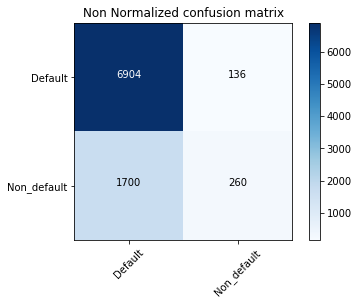

In [17]:
cnf_matrix = confusion_matrix(y_test, y_prediction)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Default', 'Non_default'], normalize=False,
                      title='Non Normalized confusion matrix')

Normalized confusion matrix
[[ 0.98068182  0.01931818]
 [ 0.86734694  0.13265306]]


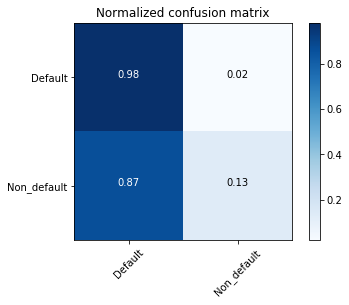

In [18]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Default', 'Non_default'], normalize=True,
                      title='Normalized confusion matrix')


#### Saving Model

In [20]:
filename = 'logistic_regression_model.sav'
pickle.dump(classifier, open(filename, 'wb'))